##### Hier werden Ergebnisse der durchgeführten Simulationen dargestellt.

In [1]:
# Notwendige Bibliotheken importieren
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")

### Truncation

In [ ]:
# Laden der Ergebnisse für die Truncation Strategie
trunc_atte = pd.read_csv('Code/Simulationen mit Random Forest + Logit, RF, GradBoost/Ergebnisse/trunc_atte_rf+logit_rf_gb.csv')
trunc_ate = pd.read_csv('Code/Simulationen mit Random Forest + Logit, RF, GradBoost/Ergebnisse/trunc_ate_rf+logit_rf_gb.csv')

In [3]:
# Übersicht der Ergebnisse für die Truncation Strategie: Anteil der Behandelten, Anteil der trunkierten Werte, durchschnittliche absolute Verzerrung, Varianz, MSE und Coverage erstellen
trunc_data = []
learner_list = ['RandomForestRegressor(),LogisticRegressionCV()', 'RandomForestRegressor(),RandomForestClassifier()', 'RandomForestRegressor(),GradientBoostingClassifier()']
for res, res_name in zip([trunc_atte, trunc_ate], ['ATTE', 'ATE']):
    for learner in learner_list:
        result_df = res.loc[res.learner == learner]
        for col in result_df.trim_value.unique():
            mean_share_treated = result_df.loc[result_df.trim_value == col, 'share_treated'].mean()
            mean_share_trim_top = result_df.loc[result_df.trim_value == col, 'share_trimmed_top'].mean()
            mean_share_trim_bottom = result_df.loc[result_df.trim_value == col, 'share_trimmed_bottom'].mean()
            mean_share_trim_orcl_top = result_df.loc[result_df.trim_value == col, 'share_trim_orcl_top'].mean()
            mean_share_trim_orcl_bottom = result_df.loc[result_df.trim_value == col, 'share_trim_orcl_bottom'].mean()
            mean_oracle = result_df.loc[result_df.trim_value == col, 'oracle'].mean()
            mean_abs_bias = result_df.loc[result_df.trim_value == col, 'mean_abs_bias'].iloc[0]
            mean_std_err = result_df.loc[result_df.trim_value == col, 'std err'].mean()
            var = result_df.loc[result_df.trim_value == col, 'var'].iloc[0]
            mse = result_df.loc[result_df.trim_value == col, 'MSE'].iloc[0]
            cov = result_df.loc[result_df.trim_value == col, 'coverage'].iloc[0]
            mean_loss_g0 = result_df.loc[result_df.trim_value == col, 'loss_g0'].mean()
            mean_loss_g1 = result_df.loc[result_df.trim_value == col, 'loss_g1'].mean()
            mean_loss_m = result_df.loc[result_df.trim_value == col, 'loss_m'].mean()
            # Spaltenwerte umbenennen
            if learner == 'RandomForestRegressor(),LogisticRegressionCV()':
                methods = 'RF + Logit'
            elif learner == 'RandomForestRegressor(),RandomForestClassifier()':
                methods = 'RF + RF'
            else:
                methods = 'RF + GradBoost'
            row = {
                'res_name': res_name,
                'learner': methods + ' Truncation',
                'trim_value': col,
                'mean_share_treated': mean_share_treated,
                'mean_share_trim_top': mean_share_trim_top,
                'mean_share_trim_bottom': mean_share_trim_bottom,
                'mean_share_trim_orcl_top': mean_share_trim_orcl_top,
                'mean_share_trim_orcl_bottom': mean_share_trim_orcl_bottom,
                'mean_share_trim': mean_share_trim_top + mean_share_trim_bottom,
                'mean_share_trim_orcl': mean_share_trim_orcl_top + mean_share_trim_orcl_bottom,
                'mean_oracle': mean_oracle,
                'mean_abs_bias': mean_abs_bias,
                'mean_std_err': mean_std_err,
                'var': var,
                'MSE': mse,
                'coverage': cov,
                'mean_loss_g0': mean_loss_g0,
                'mean_loss_g1': mean_loss_g1,
                'mean_loss_m': mean_loss_m
            }
            trunc_data.append(row)
df_trunc = pd.DataFrame(trunc_data)

In [4]:
# Aufrunden der Werte für die Truncation Strategie
df_trunc_round = df_trunc.round({'mean_share_treated': 2, 'mean_share_trim_top': 2, 'mean_share_trim_bottom': 2, 'mean_share_trim_orcl_top': 2, 'mean_share_trim_orcl_bottom': 2, 'mean_share_trim': 2, 'mean_share_trim_orcl': 2, 'mean_orcl': 4, 'mean_abs_bias': 4, 'mean_std_err': 4, 'var': 4, 'MSE': 4, 'coverage': 4, 'mean_loss_g0': 4, 'mean_loss_g1': 4, 'mean_loss_m': 4})

### Discarding

In [ ]:
# Laden der Ergebnisse für die Discarding Strategie
disc_atte = pd.read_csv('Code/Simulationen mit Random Forest + Logit, RF, GradBoost/Ergebnisse/disc_atte_rf+logit_rf_gb.csv')
disc_ate = pd.read_csv('Code/Simulationen mit Random Forest + Logit, RF, GradBoost/Ergebnisse/disc_ate_rf+logit_rf_gb.csv')

In [6]:
# Übersicht der Ergebnisse für die Discarding Strategie: Anteil der Behandelten, Anteil der entfernten extremen Propensity Scores, durchschnittliche absolute Verzerrung, Varianz, MSE und Coverage erstellen
data_disc  = []
learner_list = ['RandomForestRegressor(),LogisticRegressionCV()', 'RandomForestRegressor(),RandomForestClassifier()', 'RandomForestRegressor(),GradientBoostingClassifier()']
for res, res_name in zip([disc_atte, disc_ate], ['ATTE', 'ATE']):
    for learner in learner_list:
        df = res.loc[res.learner == learner]
        for col in df.trim_value.unique():
            mean_share_treated_pop = df.loc[df.trim_value == col, 'share_treated_pop'].mean()            
            mean_share_treated_sample = df.loc[df.trim_value == col, 'share_treated_sample'].mean()
            mean_share_trim_top = df.loc[df.trim_value == col, 'share_trimmed_top'].mean()
            mean_share_trim_bottom = df.loc[df.trim_value == col, 'share_trimmed_bottom'].mean()     
            mean_share_trim_orcl_top = df.loc[df.trim_value == col, 'share_trim_orcl_top'].mean()
            mean_share_trim_orcl_bottom = df.loc[df.trim_value == col, 'share_trim_orcl_bottom'].mean() 
            mean_oracle = df.loc[df.trim_value == col, 'oracle'].mean()
            mean_abs_bias = df.loc[df.trim_value == col, 'mean_abs_bias'].iloc[0]
            mean_std_err = df.loc[df.trim_value == col, 'std err'].mean()
            var = df.loc[df.trim_value == col, 'var'].iloc[0]
            mse = df.loc[df.trim_value == col, 'MSE'].iloc[0]
            cov = df.loc[df.trim_value == col, 'coverage'].iloc[0]
            mean_loss_g0 = df.loc[df.trim_value == col, 'loss_g0'].mean()
            mean_loss_g1 = df.loc[df.trim_value == col, 'loss_g1'].mean()
            mean_loss_m = df.loc[df.trim_value == col, 'loss_m'].mean()
            # Spaltenwerte umbenennen
            if learner == 'RandomForestRegressor(),LogisticRegressionCV()':
                methods = 'RF + Logit'
            elif learner == 'RandomForestRegressor(),RandomForestClassifier()':
                methods = 'RF + RF'
            else:
                methods = 'RF + GradBoost'
            row = {
                'res_name': res_name,
                'learner': methods + ' Discarding',
                'trim_value': col,
                'mean_share_treated_pop': mean_share_treated_pop,
                'mean_share_treated_sample': mean_share_treated_sample,
                'mean_share_trim_top': mean_share_trim_top,
                'mean_share_trim_bottom': mean_share_trim_bottom,
                'mean_share_trim_orcl_top': mean_share_trim_orcl_top,
                'mean_share_trim_orcl_bottom': mean_share_trim_orcl_bottom,
                'mean_share_trim': mean_share_trim_top + mean_share_trim_bottom,
                'mean_share_trim_orcl': mean_share_trim_orcl_top + mean_share_trim_orcl_bottom,
                'mean_oracle': mean_oracle,
                'mean_abs_bias': mean_abs_bias,
                'mean_std_err': mean_std_err,
                'var': var,
                'MSE': mse,
                'coverage': cov,
                'mean_loss_g0': mean_loss_g0,
                'mean_loss_g1': mean_loss_g1,
                'mean_loss_m': mean_loss_m
            }
            data_disc.append(row)

df_disc  = pd.DataFrame(data_disc)

In [7]:
# Aufrunden der Werte für die Discarding Strategie
df_disc_round = df_disc.round({'mean_share_treated_pop': 2, 'mean_share_treated_sample': 2, 'mean_share_trim_top': 2, 'mean_share_trim_bottom': 2, 'mean_share_trim_orcl_top': 2, 'mean_share_trim_orcl_bottom': 2, 'mean_share_trim': 2, 'mean_share_trim_orcl':2, 'mean_orcl': 4, 'mean_abs_bias': 4, 'mean_std_err': 4, 'var': 4, 'MSE': 4, 'coverage': 4, 'mean_loss_g0': 4, 'mean_loss_g1': 4, 'mean_loss_m': 4})

#### Ergebnisse anschauen

In [8]:
# Tabellarische Übersicht für ATTE mit Truncation Strategie
df_trunc_round[df_trunc_round.res_name == 'ATTE'].drop(columns = ['res_name']).reset_index(drop=True)

,learner,trim_value,mean_share_treated,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim,mean_share_trim_orcl,mean_oracle,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,RF + Logit Truncation,0.001,49.99,1.48,1.48,2.82,2.84,2.96,5.66,1.429896,0.2465,0.2076,0.1799,0.1770,0.761,1.0984,1.1163,0.3335
1,RF + Logit Truncation,0.010,49.99,6.13,6.19,10.18,10.25,12.32,20.43,1.429896,0.2018,0.1619,0.0702,0.0664,0.763,1.0991,1.1144,0.3354
2,RF + Logit Truncation,0.050,49.99,14.90,15.01,20.76,20.87,29.92,41.64,1.429896,0.1766,0.1207,0.0537,0.0498,0.707,1.0989,1.1157,0.3423
3,RF + Logit Truncation,0.100,49.99,21.34,21.44,27.18,27.26,42.78,54.44,1.429896,0.1680,0.1054,0.0494,0.0456,0.688,1.0984,1.1162,0.3565
4,RF + RF Truncation,0.001,49.99,13.81,13.95,2.82,2.84,27.76,5.66,1.429896,2.7657,3.7655,13.0320,13.0128,0.993,1.0984,1.1163,0.3983
5,RF + RF Truncation,0.010,49.99,18.28,18.44,10.18,10.25,36.72,20.43,1.429896,0.4219,0.5500,0.2841,0.2852,0.956,1.0987,1.1171,0.3842
6,RF + RF Truncation,0.050,49.99,26.12,26.16,20.76,20.87,52.28,41.64,1.429896,0.2018,0.1917,0.0675,0.0640,0.866,1.0986,1.1161,0.3768
7,RF + RF Truncation,0.100,49.99,31.01,31.07,27.18,27.26,62.09,54.44,1.429896,0.1770,0.1322,0.0527,0.0487,0.764,1.0987,1.1169,0.3850
8,RF + GradBoost Truncation,0.001,49.99,0.00,0.00,2.82,2.84,0.00,5.66,1.429896,0.3180,0.3873,0.1819,0.1780,0.942,1.0984,1.1163,0.3510
9,RF + GradBoost Truncation,0.010,49.99,7.83,7.98,10.18,10.25,15.81,20.43,1.429896,0.2967,0.3484,0.1461,0.1441,0.932,1.0987,1.1171,0.3510


In [9]:
# Tabellarische Übersicht für ATE mit Truncation Strategie
df_trunc_round[df_trunc_round.res_name == 'ATE'].drop(columns = ['res_name']).reset_index(drop=True)

,learner,trim_value,mean_share_treated,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim,mean_share_trim_orcl,mean_oracle,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,RF + Logit Truncation,0.001,49.99,1.48,1.48,2.82,2.84,2.96,5.66,-0.002383,0.2744,0.2027,0.1906,0.2039,0.629,1.0984,1.1163,0.3335
1,RF + Logit Truncation,0.010,49.99,6.13,6.19,10.18,10.25,12.32,20.43,-0.002383,0.2195,0.1374,0.0464,0.0717,0.617,1.0991,1.1144,0.3354
2,RF + Logit Truncation,0.050,49.99,14.90,15.01,20.76,20.87,29.92,41.64,-0.002383,0.2153,0.1004,0.0338,0.0680,0.508,1.0989,1.1157,0.3423
3,RF + Logit Truncation,0.100,49.99,21.34,21.44,27.18,27.26,42.78,54.44,-0.002383,0.2197,0.0892,0.0314,0.0699,0.431,1.0984,1.1162,0.3565
4,RF + RF Truncation,0.001,49.99,13.81,13.95,2.82,2.84,27.76,5.66,-0.002383,2.1782,2.9189,7.3597,7.7761,0.978,1.0984,1.1163,0.3983
5,RF + RF Truncation,0.010,49.99,18.28,18.44,10.18,10.25,36.72,20.43,-0.002383,0.3172,0.4171,0.1504,0.1571,0.950,1.0987,1.1171,0.3842
6,RF + RF Truncation,0.050,49.99,26.12,26.16,20.76,20.87,52.28,41.64,-0.002383,0.2204,0.1500,0.0407,0.0727,0.692,1.0986,1.1161,0.3768
7,RF + RF Truncation,0.100,49.99,31.01,31.07,27.18,27.26,62.09,54.44,-0.002383,0.2209,0.1083,0.0335,0.0712,0.515,1.0987,1.1169,0.3850
8,RF + GradBoost Truncation,0.001,49.99,0.00,0.00,2.82,2.84,0.00,5.66,-0.002383,0.2682,0.3056,0.1097,0.1162,0.914,1.0984,1.1163,0.3510
9,RF + GradBoost Truncation,0.010,49.99,7.83,7.98,10.18,10.25,15.81,20.43,-0.002383,0.2390,0.2714,0.0807,0.0893,0.919,1.0987,1.1171,0.3510


In [10]:
# Tabellarische Übersicht für ATTE mit Discarding Strategie
df_disc_round[df_disc_round.res_name == 'ATTE'].drop(columns = ['res_name']).reset_index(drop=True)

,learner,trim_value,mean_share_treated_pop,mean_share_treated_sample,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim,mean_share_trim_orcl,mean_oracle,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,RF + Logit Discarding,0.001,49.99,49.97,1.49,1.47,2.82,2.84,2.96,5.66,1.328874,0.2306,0.1958,0.1138,0.1083,0.789,1.0982,1.1155,0.3437
1,RF + Logit Discarding,0.010,49.99,50.00,6.28,6.30,10.18,10.25,12.58,20.43,1.101551,0.1800,0.1604,0.0727,0.0517,0.812,1.0986,1.1157,0.3792
2,RF + Logit Discarding,0.050,49.99,50.08,15.00,15.12,20.76,20.87,30.12,41.64,0.777125,0.1358,0.1307,0.0662,0.0294,0.853,1.1014,1.1176,0.4530
3,RF + Logit Discarding,0.100,49.99,50.06,21.30,21.38,27.18,27.26,42.68,54.44,0.577231,0.1221,0.1266,0.0676,0.0238,0.887,1.1037,1.1192,0.5108
4,RF + RF Discarding,0.001,49.99,50.06,13.84,13.94,2.82,2.84,27.79,5.66,0.976879,0.3874,0.5267,0.2547,0.2495,0.971,1.1005,1.1204,0.4832
5,RF + RF Discarding,0.010,49.99,50.06,18.29,18.41,10.18,10.25,36.70,20.43,0.976879,0.3899,0.5276,0.2567,0.2513,0.972,1.1007,1.1205,0.4832
6,RF + RF Discarding,0.050,49.99,50.04,26.12,26.16,20.76,20.87,52.28,41.64,0.633677,0.1828,0.2257,0.0649,0.0521,0.945,1.1035,1.1262,0.5677
7,RF + RF Discarding,0.100,49.99,49.99,31.00,31.02,27.18,27.26,62.02,54.44,0.487984,0.1569,0.1870,0.0482,0.0388,0.935,1.1070,1.1293,0.6080
8,RF + GradBoost Discarding,0.001,49.99,49.99,0.00,0.00,2.82,2.84,0.00,5.66,1.429889,0.3114,0.3871,0.1785,0.1752,0.939,1.0980,1.1164,0.3512
9,RF + GradBoost Discarding,0.010,49.99,50.15,7.76,8.02,10.18,10.25,15.78,20.43,1.104851,0.2557,0.3378,0.1316,0.1071,0.957,1.0990,1.1186,0.4078


In [11]:
# Tabellarische Übersicht für ATE mit Discarding Strategie
df_disc_round[df_disc_round.res_name == 'ATE'].drop(columns = ['res_name']).reset_index(drop=True)

,learner,trim_value,mean_share_treated_pop,mean_share_treated_sample,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim,mean_share_trim_orcl,mean_oracle,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,RF + Logit Discarding,0.001,49.99,49.97,1.49,1.47,2.82,2.84,2.96,5.66,-0.003409,0.2319,0.1865,0.1116,0.1193,0.693,1.0982,1.1155,0.3437
1,RF + Logit Discarding,0.010,49.99,50.00,6.28,6.30,10.18,10.25,12.58,20.43,-0.001247,0.1631,0.1339,0.0364,0.0414,0.774,1.0986,1.1157,0.3792
2,RF + Logit Discarding,0.050,49.99,50.08,15.00,15.12,20.76,20.87,30.12,41.64,0.002418,0.1286,0.1093,0.0238,0.0263,0.828,1.1014,1.1176,0.4530
3,RF + Logit Discarding,0.100,49.99,50.06,21.30,21.38,27.18,27.26,42.68,54.44,0.001661,0.1191,0.1084,0.0212,0.0224,0.850,1.1037,1.1192,0.5108
4,RF + RF Discarding,0.001,49.99,50.06,13.84,13.94,2.82,2.84,27.79,5.66,0.002063,0.2899,0.4015,0.1334,0.1354,0.958,1.1005,1.1204,0.4832
5,RF + RF Discarding,0.010,49.99,50.06,18.29,18.41,10.18,10.25,36.70,20.43,0.002063,0.2888,0.4017,0.1322,0.1341,0.958,1.1007,1.1205,0.4832
6,RF + RF Discarding,0.050,49.99,50.04,26.12,26.16,20.76,20.87,52.28,41.64,0.002899,0.1682,0.1799,0.0410,0.0452,0.897,1.1035,1.1262,0.5677
7,RF + RF Discarding,0.100,49.99,49.99,31.00,31.02,27.18,27.26,62.02,54.44,0.001401,0.1564,0.1543,0.0356,0.0386,0.876,1.1070,1.1293,0.6080
8,RF + GradBoost Discarding,0.001,49.99,49.99,0.00,0.00,2.82,2.84,0.00,5.66,-0.002394,0.2585,0.3061,0.0999,0.1060,0.921,1.0980,1.1164,0.3512
9,RF + GradBoost Discarding,0.010,49.99,50.15,7.76,8.02,10.18,10.25,15.78,20.43,0.006180,0.2431,0.2625,0.0913,0.0941,0.892,1.0990,1.1186,0.4078


In [12]:
# Ausreißerwert von RF bei Truncation entfernen
df_trunc_filtered = df_trunc.loc[df_trunc.mean_abs_bias < 1]

In [13]:
# Wegen identischer Werte für ml_g1 und ml_g0 mit RF und GradBoost, werden Werte mit GradBoost leicht verschoben
df_trunc.loc[df_trunc.learner == 'RF + GradBoost Truncation', 'mean_loss_g1'] += 0.0001
df_trunc.loc[df_trunc.learner == 'RF + GradBoost Truncation', 'mean_loss_g0'] += 0.0001

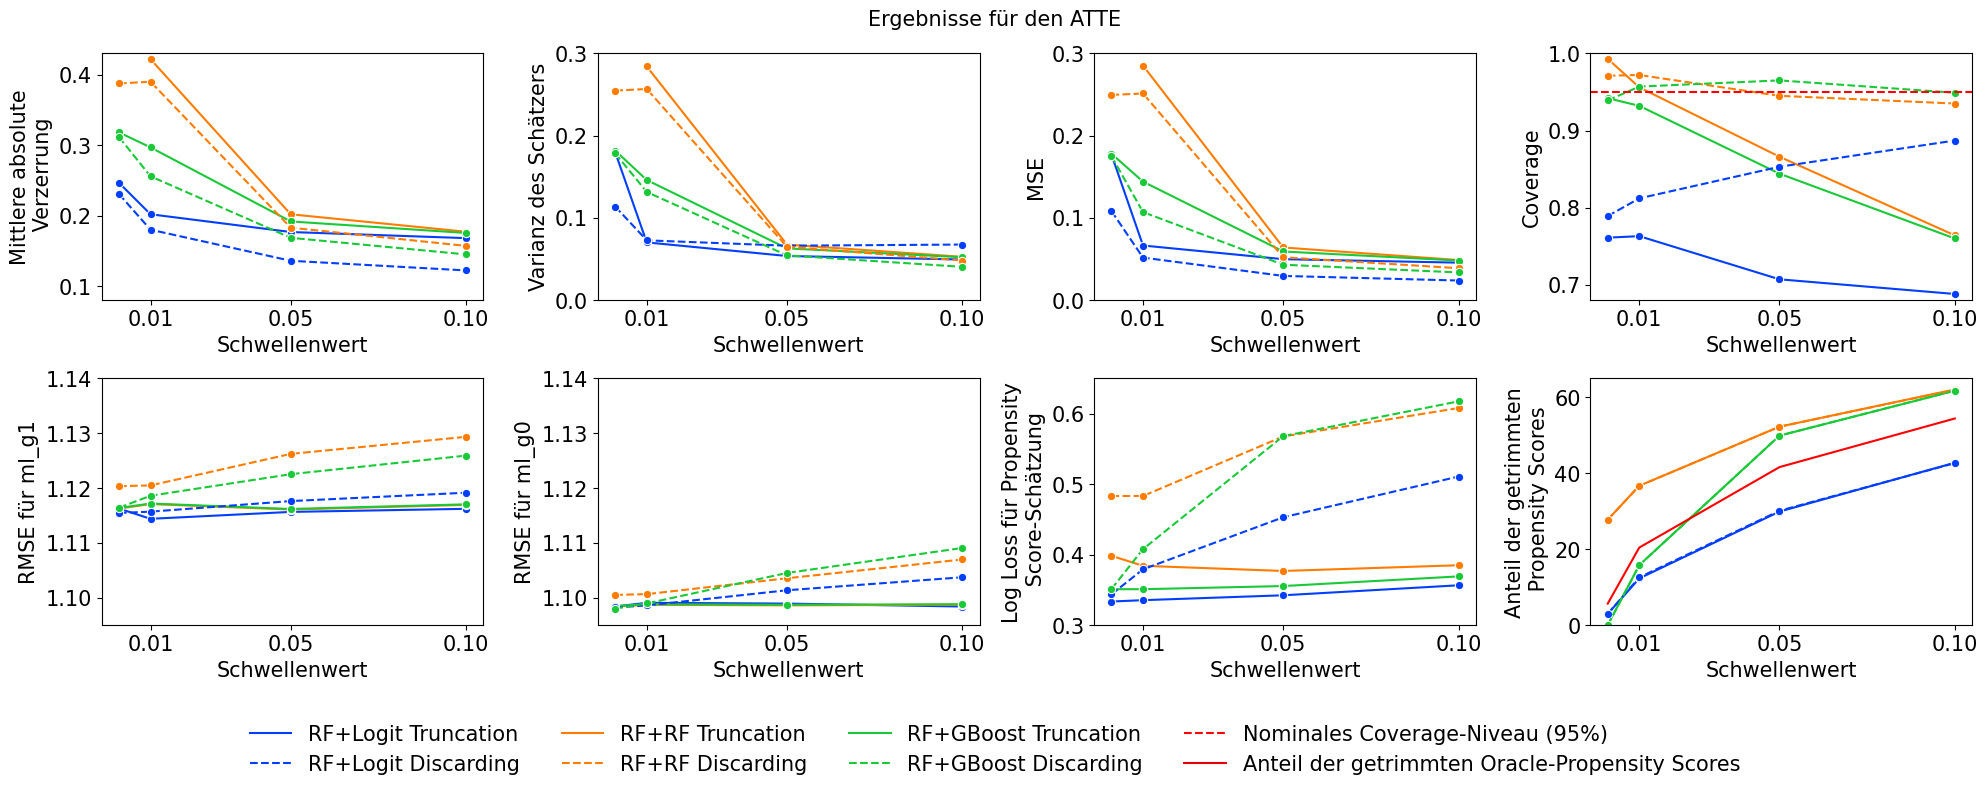

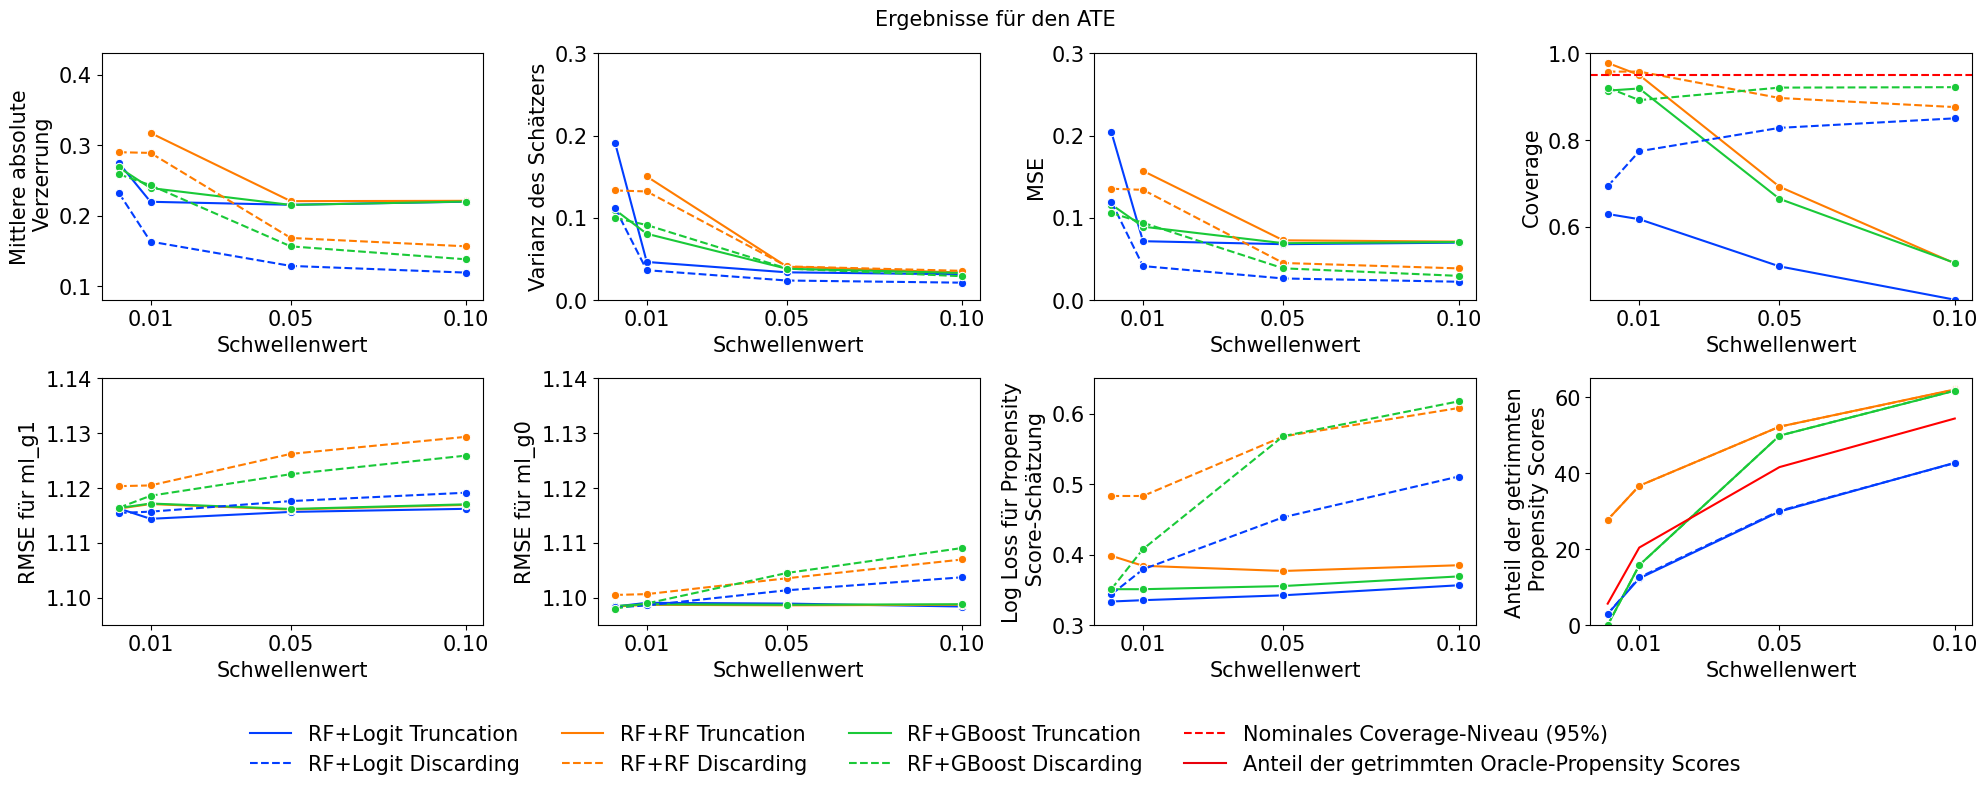

In [14]:
# Ergenisse plotten
for res_name in ['ATTE', 'ATE']:
    fig, ax = plt.subplots(nrows=2 , ncols=4, figsize=(20, 7))
    ax = ax.flatten()

     # Schriftgröße für die Achsenbeschriftung
    for a in ax:
        a.tick_params(axis='both', labelsize=15)
        xticks = [0.01, 0.05, 0.1]
        a.set_xticks(xticks)

    # Plot der mittleren absoluten Verzerrung
    sns.lineplot(x='trim_value', y='mean_abs_bias', hue='learner', data=df_trunc_filtered.loc[df_trunc_filtered.res_name == res_name], ax=ax[0], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_abs_bias', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[0], marker='o', palette='bright', linestyle='dashed', legend=False)
    ax[0].set_xlabel('Schwellenwert', fontsize=15)
    ax[0].set_ylabel('Mittlere absolute\n Verzerrung', fontsize=15)
    ax[0].set_ylim(0.08, 0.43)
    
    # Plot der Varianz des Schätzers
    sns.lineplot(x='trim_value', y='var', hue='learner', data=df_trunc_filtered.loc[df_trunc_filtered.res_name == res_name], ax=ax[1],  marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='var', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[1],  marker='o', palette='bright', linestyle='dashed', legend=False)
    ax[1].set_xlabel('Schwellenwert', fontsize=15)
    ax[1].set_ylabel('Varianz des Schätzers', fontsize=15) 
    ax[1].set_ylim(0.0, 0.3)
    
    # MSE
    sns.lineplot(x='trim_value', y='MSE', hue='learner', data=df_trunc_filtered.loc[df_trunc_filtered.res_name == res_name], ax=ax[2], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='MSE', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[2], marker='o', palette='bright', linestyle='dashed', legend=False)
    ax[2].set_xlabel('Schwellenwert', fontsize=15)
    ax[2].set_ylabel('MSE', fontsize=15)
    ax[2].set_ylim(0.0, 0.3)

    # Coverage Plot
    sns.lineplot(x='trim_value', y='coverage', hue='learner', data=df_trunc.loc[df_trunc.res_name == res_name], ax=ax[3], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='coverage', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[3], marker='o', palette='bright', linestyle='dashed', legend=False)
    # Horizontale Linie für nominales Niveau von Coverage (95%)
    ax[3].axhline(y=0.95, color='red', linestyle='--', label='Nominales Coverage-Niveau (95%)')
    ax[3].set_xlabel('Schwellenwert', fontsize=15)
    ax[3].set_ylabel('Coverage', fontsize=15)
    if res_name == 'ATTE':
        ax[3].set_ylim(0.68, 1)
    else:
        ax[3].set_ylim(0.43, 1) 

    # Durchschnittlicher Verlust für die Behandlungsgruppe ml_g1
    sns.lineplot(x='trim_value', y='mean_loss_g1', hue='learner', data=df_trunc.loc[df_trunc.res_name == res_name], ax=ax[4], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_loss_g1', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[4], marker='o', palette='bright', linestyle='dashed', legend=False)
    ax[4].set_xlabel('Schwellenwert', fontsize=15)
    ax[4].set_ylabel('RMSE für ml_g1', fontsize=15)    
    ax[4].set_ylim(1.095, 1.14)
    
    # Durchschnittlicher Verlust für die Kontrollgruppe 
    sns.lineplot(x='trim_value', y='mean_loss_g0', hue='learner', data=df_trunc.loc[df_trunc.res_name == res_name], ax=ax[5], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_loss_g0', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[5], marker='o', palette='bright', linestyle='dashed', legend=False)
    ax[5].set_xlabel('Schwellenwert', fontsize=15)
    ax[5].set_ylabel('RMSE für ml_g0', fontsize=15)     
    ax[5].set_ylim(1.095, 1.14)
    
    # Durchschnittlicher Log Loss für die PS Schätzung
    sns.lineplot(x='trim_value', y='mean_loss_m', hue='learner', data=df_trunc.loc[df_trunc.res_name == res_name], ax=ax[6], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_loss_m', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[6], marker='o', palette='bright', linestyle='dashed', legend=False)
    ax[6].set_xlabel('Schwellenwert', fontsize=15)
    ax[6].set_ylabel('Log Loss für Propensity\n Score-Schätzung', fontsize=15)   
    ax[6].set_ylim(0.30, 0.65)
    
    # Durchschnittliche Anteil der getrimmten PS Werte/Beobachtungen
    sns.lineplot(x='trim_value', y='mean_share_trim', hue='learner', data=df_trunc.loc[df_trunc.res_name == res_name], ax=ax[7], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_share_trim', hue='learner', data=df_disc.loc[df_disc.res_name == res_name], ax=ax[7], marker='o', palette='bright', linestyle='dashed', legend=False)
    ax[7].plot(df_trunc.loc[df_trunc.res_name == res_name]['trim_value'].iloc[0:4], df_trunc.loc[df_trunc.res_name == res_name]['mean_share_trim_orcl'].iloc[0:4], linestyle='-', color='red')
    ax[7].set_xlabel('Schwellenwert', fontsize=15)
    ax[7].set_ylabel('Anteil der getrimmten\n Propensity Scores', fontsize=15)   
    ax[7].set_ylim(0, 65) 
    
    # Farben aus der 'bright'-Palette extrahieren
    colors = sns.color_palette('bright')

    # Manuelle Legende mit durchgezogenen und gestrichelten Linien
    handles = [
        Line2D([0], [0], color=colors[0], linestyle='-', label='RF+Logit Truncation'),
        Line2D([0], [0], color=colors[0], linestyle='--', label='RF+Logit Discarding'),
        Line2D([0], [0], color=colors[1], linestyle='-', label='RF+RF Truncation'),
        Line2D([0], [0], color=colors[1], linestyle='--', label='RF+RF Discarding'),
        Line2D([0], [0], color=colors[2], linestyle='-', label='RF+GBoost Truncation'),
        Line2D([0], [0], color=colors[2], linestyle='--', label='RF+GBoost Discarding'),
        Line2D([0], [0], color='red', linestyle='--', label='Nominales Coverage-Niveau (95%)'),
        Line2D([0], [0], color=colors[3], linestyle='-', label='Anteil der getrimmten Oracle-Propensity Scores')]

    # Legende korrekt platzieren
    fig.legend(handles=handles, loc='lower center', fontsize=15, bbox_to_anchor=(0.5, -0.14), ncols=4, frameon=False)
    fig.suptitle(f'Ergebnisse für den {res_name}', fontsize=15)  
    fig.tight_layout()

In [ ]:
# ATTE Ergebnisse als Tabelle für den Anhang speichern - für die Truncation Strategie
results_trunc_for_tab = df_trunc_round[['res_name', 'learner', 'trim_value', 'mean_abs_bias', 'var', 'MSE', 'coverage']]
tab1 = results_trunc_for_tab[results_trunc_for_tab.res_name == 'ATTE'].drop(columns = ['res_name']).reset_index(drop=True)
tab1.to_excel('Code/Simulationen mit Random Forest + Logit, RF, GradBoost/Ergebnisse/trunc_atte_tabelle.xlsx', index=False)

In [ ]:
# ATE Ergebnisse als Tabelle für den Anhang speichern - für die Truncation Strategie
tab2 = results_trunc_for_tab[results_trunc_for_tab.res_name == 'ATE'].drop(columns = ['res_name']).reset_index(drop=True)
tab2.to_excel('Code/Simulationen mit Random Forest + Logit, RF, GradBoost/Ergebnisse/trunc_ate_tabelle.xlsx', index=False)